# Análisis del Conjunto de Datos de Palmer Penguins

En este notebook, realizaremos un análisis exploratorio de datos (EDA) utilizando el conjunto de datos de Palmer Penguins. Este análisis incluye visualizaciones, análisis estadístico, clustering, y reducción de dimensionalidad.

# 🐧 ¡Bienvenidos al Maravilloso Mundo de los Pingüinos Palmer! 🐧


***¿Cansado de analizar datos aburridos como ventas, precios o temperaturas?*** ¡Es hora de cambiar de ambiente  y sumergirnos en el *hielo antártico* con los adorables pingüinos Palmer!
El paquete palmerpenguins nos trae un emocionante conjunto de datos que recopila información sobre tres especies de pingüinos que habitan en las islas Anvers, de la base PAlMER, en la Antártida: Adelie, Chinstrap y Gentoo. Estos pequeños (o no tan pequeños) habitantes de las regiones heladas son perfectos para practicar tus habilidades en análisis de datos.

> Estas pequeñas pero encantadoras criaturas —Adelie, Chinstrap y Gentoo— fueron estudiadas por científicos del Palmer Station LTER (Long Term Ecological Research), un programa que observa el ecosistema a largo plazo.

¡Y no! No son solo adorables bolitas de plumas. Estos pingüinos tienen mucho que contarnos sobre sus características físicas: desde la longitud de sus aletas hasta su masa corporal. Así que si estás listo para analizar estos fascinantes pingüinos, ¡prepárate para embarcarte en este viaje analítico!

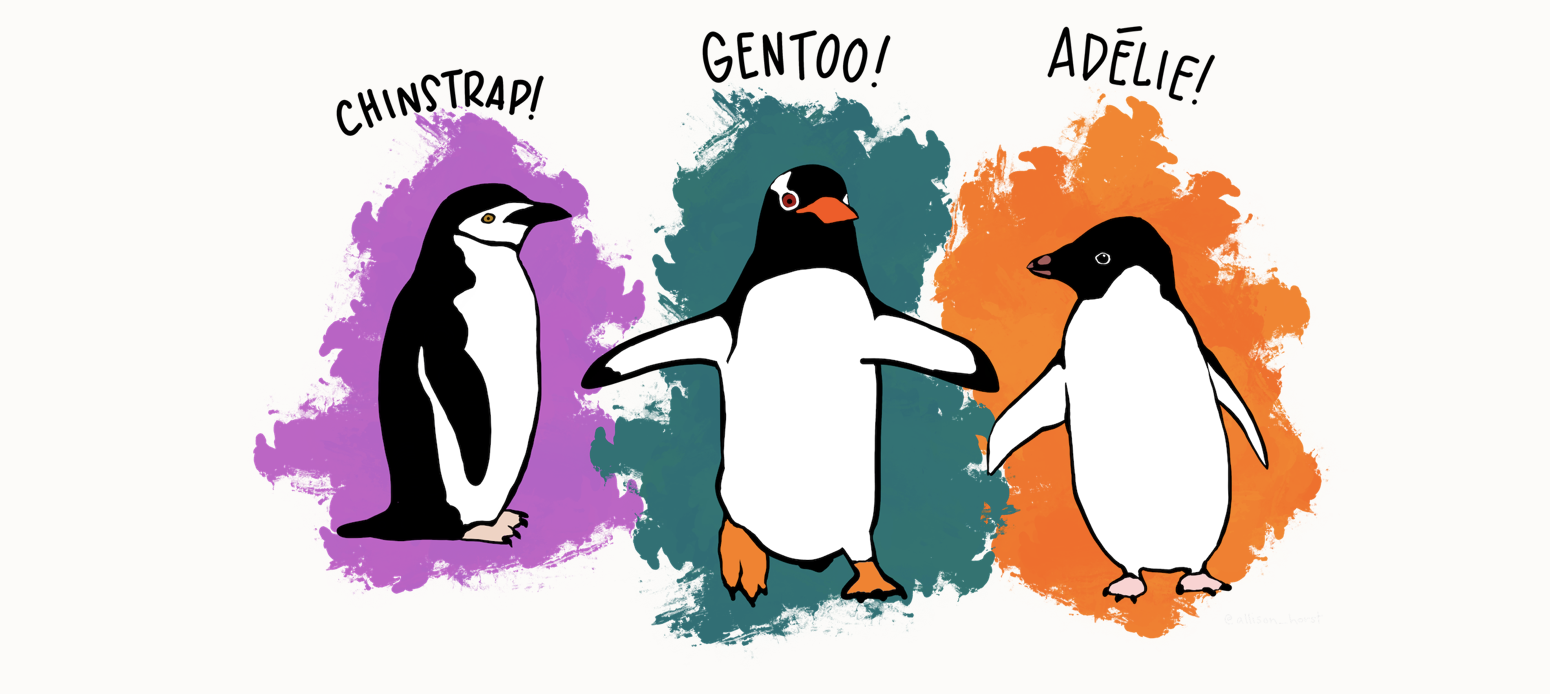



> “Artwork by @allison_horst”.



Manos a la Obra!

Primero se requiere instalar el paquete de `palmerpenguin``


In [ ]:
# Instalación de paquetes necesarios
!pip install palmerpenguins seaborn matplotlib scikit-learn scipy

In [ ]:
# Importación de librerías, haciendo un spoiler alert! sobre Pandas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from palmerpenguins import load_penguins # Recuerden, puede ser el nombre que quieran
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import stats

In [ ]:
# Cargar el conjunto de datos
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


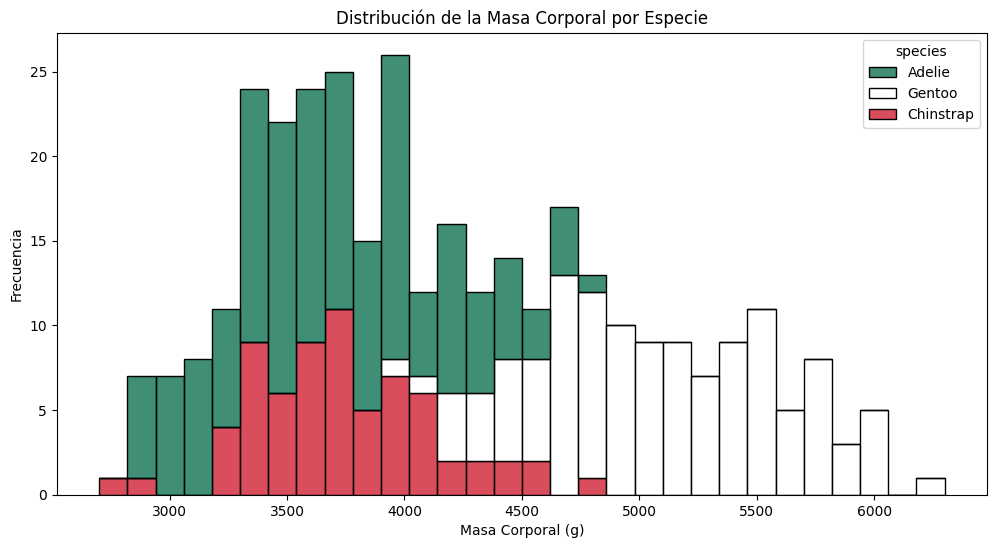

In [ ]:
# Distribución de la Masa Corporal por Especie
plt.figure(figsize=[12, 6])
sns.histplot(data=penguins, x='body_mass_g', hue='species', multiple='stack', bins=30, palette=mexico_palette)
plt.title('Distribución de la Masa Corporal por Especie')
plt.xlabel('Masa Corporal (g)')
plt.ylabel('Frecuencia')
plt.show()

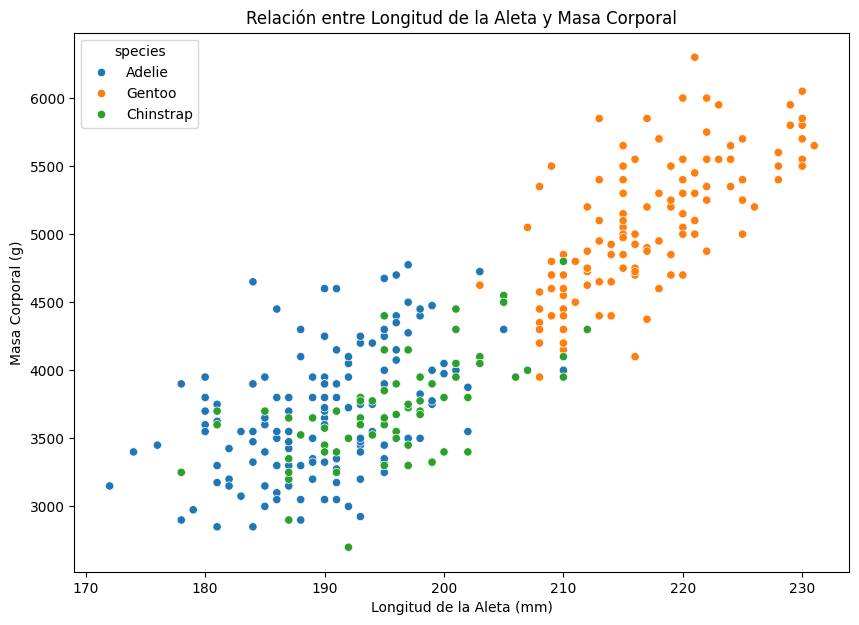

In [ ]:
# Relación entre Longitud de la Aleta y Masa Corporal
plt.figure(figsize=[10, 7])
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', hue='species', data=penguins)
plt.title('Relación entre Longitud de la Aleta y Masa Corporal')
plt.xlabel('Longitud de la Aleta (mm)')
plt.ylabel('Masa Corporal (g)')
plt.show()

In [ ]:
# Calcular estadísticas básicas por especie
species_groups = penguins.groupby('species')['body_mass_g']
mean_mass = species_groups.mean()
std_mass = species_groups.std()
print('Mean Body Mass (g):')
print(mean_mass)
print('\nStandard Deviation of Body Mass (g):')
print(std_mass)

Mean Body Mass (g):
species
Adelie       3700.662252
Chinstrap    3733.088235
Gentoo       5076.016260
Name: body_mass_g, dtype: float64

Standard Deviation of Body Mass (g):
species
Adelie       458.566126
Chinstrap    384.335081
Gentoo       504.116237
Name: body_mass_g, dtype: float64


In [ ]:
# Comparación de medias utilizando ANOVA
species_list = penguins['species'].unique()
groups = [penguins[penguins['species'] == sp]['body_mass_g'] for sp in species_list]
f_val, p_val = stats.f_oneway(*groups)
print(f'F-valor: {f_val:.2f}, p-valor: {p_val:.3f}')

F-valor: nan, p-valor: nan


El anterior código no funciona, ¿porque?

In [ ]:
# Eliminar filas con valores faltantes en 'body_mass_g'
penguins_clean = penguins.dropna(subset=['body_mass_g'])

# Obtener las especies únicas
species_list = penguins_clean['species'].unique()

# Crear listas con los datos de masa corporal por especie
groups = [penguins_clean[penguins_clean['species'] == sp]['body_mass_g'] for sp in species_list]

# Realizar ANOVA de una vía
f_val, p_val = stats.f_oneway(*groups)

# Mostrar los resultados
print(f'F-valor: {f_val:.2f}, p-valor: {p_val:.3f}')


F-valor: 343.63, p-valor: 0.000


El análisis ANOVA (Análisis de Varianza) se utiliza para comparar las medias de múltiples grupos para determinar si al menos una de las medias es significativamente diferente de las otras.

### **Hipótesis en ANOVA:**

- **Hipótesis nula (H₀):** Las medias de los grupos son iguales. En este caso, la hipótesis nula sería:
  
  > **H₀:** Las medias de la masa corporal de las especies de pingüinos son iguales.

- **Hipótesis alternativa (H₁):** Al menos una de las medias es diferente. Es decir:

  > **H₁:** Al menos una de las especies tiene una masa corporal promedio diferente a las otras.

### **Interpretación de los Resultados:**

- **F-valor:** Es la estadística de prueba de ANOVA. Un valor más alto de F indica una mayor variabilidad entre las medias de los grupos en relación con la variabilidad dentro de los grupos.

- **p-valor:** El p-valor indica si los resultados son estadísticamente significativos. Si el p-valor es pequeño (generalmente menor que 0.05), se rechaza la hipótesis nula.

En este caso:

- **F-valor = 343.63:** Indica una alta variabilidad entre las medias de las diferentes especies de pingüinos.
  
- **p-valor = 0.000:** El p-valor es muy pequeño, mucho menor que 0.05. Esto significa que hay evidencia significativa para rechazar la hipótesis nula.

### **Conclusión:**
Dado que el p-valor es extremadamente pequeño, podemos rechazar la hipótesis nula y concluir que **al menos una de las especies de pingüinos tiene una masa corporal promedio diferente a las demás**. Esto sugiere una diferencia significativa entre las especies en términos de su masa corporal.

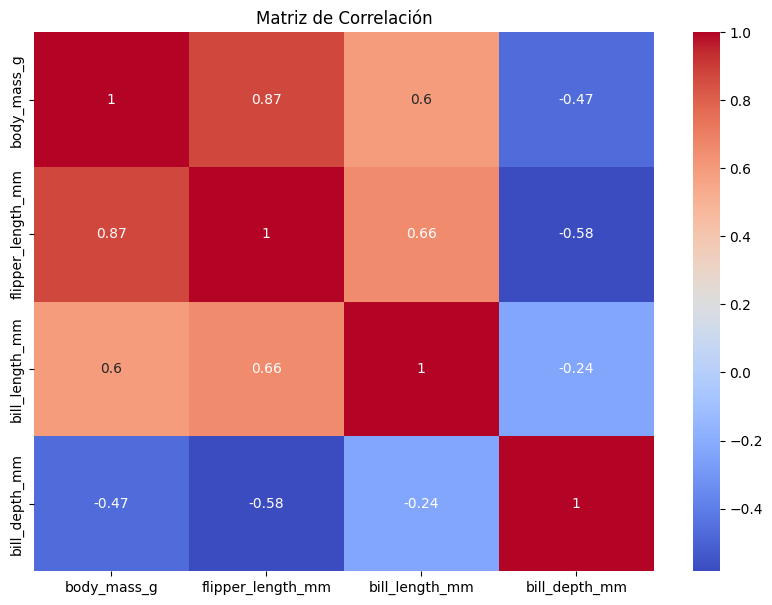

In [ ]:
# Matriz de correlación
corr_matrix = penguins[['body_mass_g', 'flipper_length_mm', 'bill_length_mm', 'bill_depth_mm']].corr()

# Visualización de la matriz de correlación
plt.figure(figsize=[10, 7])
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


In [ ]:
print(penguins.columns)


Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


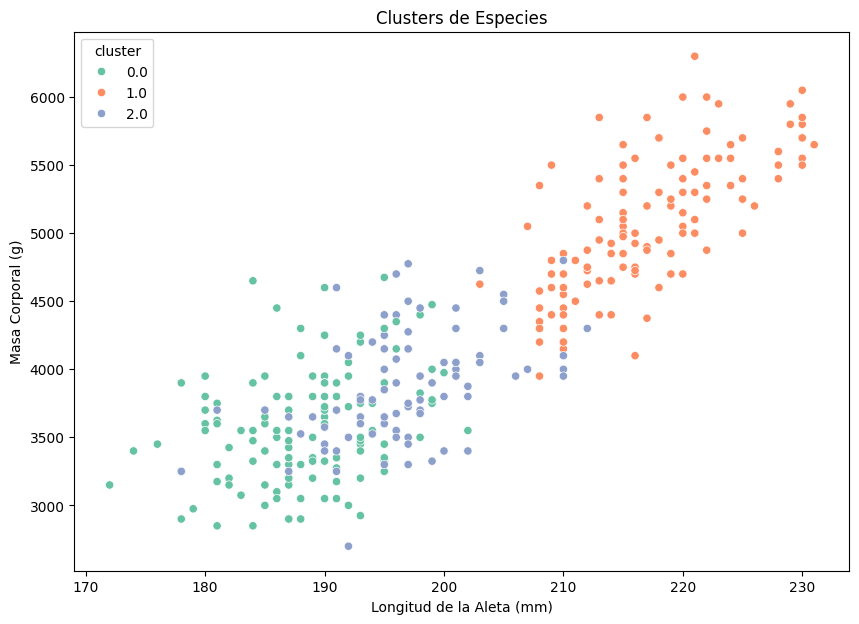

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las características disponibles, eliminando las filas con valores NaN
features = penguins[['body_mass_g', 'flipper_length_mm', 'bill_length_mm', 'bill_depth_mm']].dropna()

# Estandarizar los datos
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Realizar el clustering con K-means
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(scaled_features)

# Crear una nueva columna 'cluster' en el DataFrame original y asignar los valores del clustering solo a las filas sin NaN
penguins['cluster'] = np.nan  # Inicializamos la columna con NaN
penguins.loc[~penguins[['body_mass_g', 'flipper_length_mm', 'bill_length_mm', 'bill_depth_mm']].isna().any(axis=1), 'cluster'] = clusters

# Visualizar los clusters
plt.figure(figsize=[10, 7])
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', hue='cluster', data=penguins, palette='Set2')
plt.title('Clusters de Especies')
plt.xlabel('Longitud de la Aleta (mm)')
plt.ylabel('Masa Corporal (g)')
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


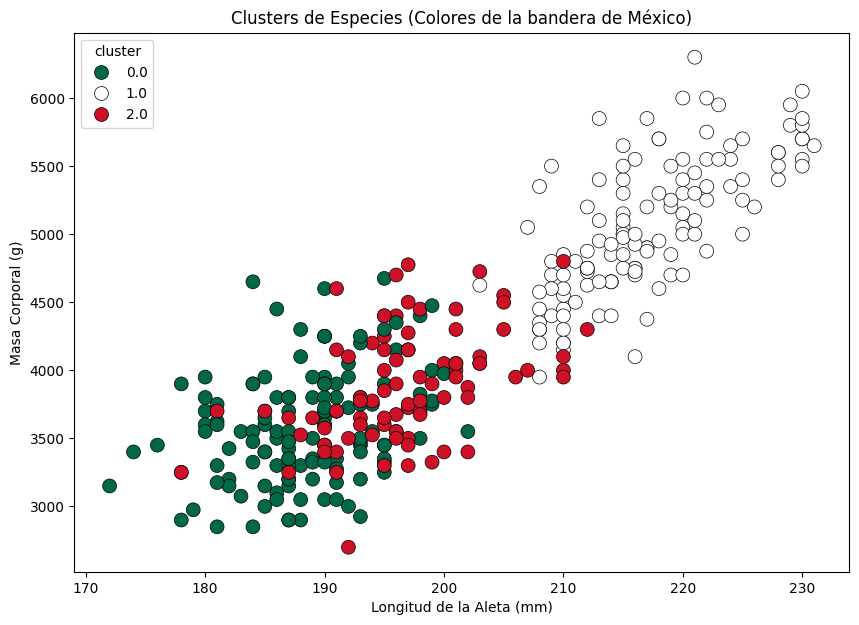

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las características disponibles, eliminando las filas con valores NaN
features = penguins[['body_mass_g', 'flipper_length_mm', 'bill_length_mm', 'bill_depth_mm']].dropna()

# Estandarizar los datos
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Realizar el clustering con K-means
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(scaled_features)

# Crear una nueva columna 'cluster' en el DataFrame original y asignar los valores del clustering solo a las filas sin NaN
penguins['cluster'] = np.nan  # Inicializamos la columna con NaN
penguins.loc[~penguins[['body_mass_g', 'flipper_length_mm', 'bill_length_mm', 'bill_depth_mm']].isna().any(axis=1), 'cluster'] = clusters

# Colores de la bandera de México: Verde, Blanco, Rojo
mexico_palette = ['#006847', '#FFFFFF', '#CE1126']

# Visualizar los clusters
plt.figure(figsize=[10, 7])
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', hue='cluster', data=penguins, palette=mexico_palette,
                edgecolor='black', linewidth=0.5, s=100)  # edgecolor es para los contornos, s ajusta el tamaño
plt.title('Clusters de Especies (Colores de la bandera de México)')
plt.xlabel('Longitud de la Aleta (mm)')
plt.ylabel('Masa Corporal (g)')
plt.show()

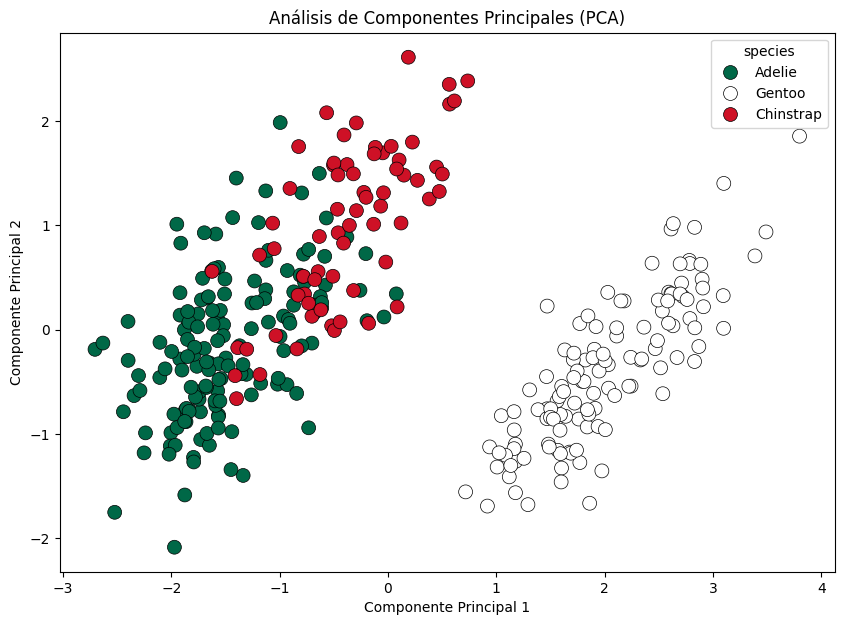

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las características correctas, eliminando las filas con valores NaN
features = penguins[['body_mass_g', 'flipper_length_mm', 'bill_length_mm', 'bill_depth_mm']].dropna()

# Estandarizar los datos
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Realizar el PCA para reducir a 2 componentes principales
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# Crear un DataFrame con los componentes principales
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Añadir la columna de 'species' para usar en el gráfico
pca_df['species'] = penguins.dropna(subset=['body_mass_g', 'flipper_length_mm', 'bill_length_mm', 'bill_depth_mm'])['species'].values

# Visualizar los componentes principales
plt.figure(figsize=[10, 7])
sns.scatterplot(x='PC1', y='PC2', hue='species', data=pca_df, palette=mexico_palette, edgecolor='black', linewidth=0.5, s=100)
plt.title('Análisis de Componentes Principales (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

